In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
import os
import re

In [4]:
dimp_dir = os.path.abspath('dimp')
OTB100 = 'C:\\Users\\alvis\\Documents\\Thesis\\pysot\\testing_dataset\\OTB100'

In [24]:
dimp_out = set(os.listdir(dimp_dir))
dimp_out = set(filter(lambda x: x.split('.')[1]=='txt' and not x.split('.')[0].endswith('_time'), dimp_out))

In [6]:
OCC = [
    'Basketball',
    'Biker',
    'Bolt',
    'Box',
    'CarScale',
    'ClifBar',
    'David',
    'DragonBaby',
    'Dudek',
    'Football ',
    'Freeman4 ',
    'Girl ',
    'Human3 ',
    'Human4 ',
    'Ironman ',
    'Jump ',
    'Liquor ',
    'Matrix ',
    'Panda ',
    'RedTeam ',
    'Skating1 ',
    'Skating2 ',
    'Soccer ',
    'Tiger ',
    'Walking ',
    'Walking2',
    'Woman',
    'Bird2 ',
    'Coke ',
    'Coupon ',
    'David3 ',
    'Doll ',
    'FaceOcc1 ',
    'FaceOcc2 ',
    'Girl2 ',
    'Human5',
    'Human7 ',
    'Jogging ',
    'KiteSurf ',
    'Lemming ',
    'Rubik',
    'Singer1 ',
    'Subway ',
    'Suv ',
    'Tiger1 ',
    'Trans',
]

In [7]:
Deformation = [
    'Basketball',
    'Bird1', 
    'Bird2', 
    'BlurBody', 
    'Bolt', 
    'Bolt2', 
    'Couple', 
    'Crossing', 
    'Crowds', 
    'Dancer', 
    'Dancer2', 
    'David', 
    'David3', 
    'Diving', 
    'Dog', 
    'Dudek', 
    'FleetFace', 
    'Girl2', 
    'Gym', 
    'Human3', 
    'Human4.2', 
    'Human5', 
    'Human6', 
    'Human7', 
    'Human8', 
    'Human9', 
    'Jogging.1', 
    'Jogging.2', 
    'Jump', 
    'Mhyang',
    'Panda', 
    'Singer2', 
    'Skater', 
    'Skater2', 
    'Skating1', 
    'Skating2.1', 
    'Skating2.2', 
    'Skiing', 
    'Subway', 
    'Tiger1', 
    'Tiger2', 
    'Trans', 
    'Walking', 
    'Woman'
]

In [8]:
metrics = {
    'OCC': OCC,
    'Deformation': Deformation
}

In [9]:
def bb_intersection_over_union(boxA, boxB):
    # print(boxA, boxB)
    # make sure all the values are intergers
    for i in range(0, 4):
        boxA[i] = int(boxA[i])
        boxB[i] = int(boxB[i])-1

    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou


In [10]:
def transform_gtbox(gt_bbox):
    gt_bbox = (gt_bbox[0], gt_bbox[1],
        gt_bbox[0]+gt_bbox[2], gt_bbox[1]+gt_bbox[3])
    return list(gt_bbox)

In [11]:
def smooth(v):
    lenght = 500
    div = int(v.shape[0]/500)
    v = v[:div * 500]
    return np.mean(v.reshape(-1, div), axis =1)

In [12]:
def append_reverse_np(item, times):
    tmp = np.array([item if i % 2 == 0 else list(reversed(item)) for i in range(times)])
    return tmp.reshape(item.shape[0]*times, 4)

In [25]:
def convert_center_to_bbb(bboxes):
    p1x = int(bboxes[0] - 1)
    p1y = int(bboxes[1] - 1)
    p2x = int(bboxes[0] + bboxes[2] - 1)
    p2y = int(bboxes[1] + bboxes[3] - 1)
    # return (p1x, p1y), (p2x, p2y)
    return np.array([p1x, p1y, p2x, p2y])


In [47]:
metrics_result = {}
for k, v in metrics.items():
    metrics_result[k] = []

dimp_acc = []
for filename in dimp_out:
    print(filename)
    sample = re.search('(.*).txt', filename).group(1)

    try:
        try:
            gt_bbox = np.loadtxt(os.path.join(OTB100, sample, 'groundtruth_rect.txt'), delimiter=',')
        except:
            gt_bbox = np.loadtxt(os.path.join(OTB100, sample, 'groundtruth_rect.txt'), delimiter='\t')
    except:
        continue

    dimp_v = np.loadtxt(os.path.join(dimp_dir, filename), delimiter='\t')
    min_dim = dimp_v.shape[0]


    gt_bbox = append_reverse_np(gt_bbox, 40)
    gt_bbox = gt_bbox[:min_dim,:]

    da = []
    for d, gt in zip(dimp_v, gt_bbox):
        # gt = convert_center_to_bbb(gt)
        d = convert_center_to_bbb(d)
        da.append(bb_intersection_over_union(d, convert_center_to_bbb(gt)))

    da = smooth(np.asarray(da))
    dimp_acc.append(da)

    for k, v in metrics_result.items():
        if sample in metrics[k]:
            v.append(da)

Human5.txt
Bolt.txt
Bolt2.txt
Woman.txt
Dog.txt
Skater2.txt
Skating1.txt
MotorRolling.txt
FleetFace.txt
Soccer.txt
Dudek.txt
Subway.txt
Human3.txt
Football1.txt
Shaking.txt
Basketball.txt
CarDark.txt
Boy.txt
Jogging_1.txt
Panda.txt
Ironman.txt
BlurCar2.txt
Mhyang.txt
Bird2.txt
Jogging_2.txt
Car2.txt
MountainBike.txt
Bird1.txt
Human8.txt
ClifBar.txt
Gym.txt
Jumping.txt
BlurBody.txt
Deer.txt
CarScale.txt
BlurOwl.txt
Girl.txt
Sylvester.txt
Freeman4.txt
Suv.txt
David3.txt
Box.txt
Dog1.txt
Dancer2.txt
Jump.txt
Freeman1.txt
Singer1.txt
Trellis.txt
Human9.txt
FaceOcc2.txt
BlurCar3.txt
Crowds.txt
Surfer.txt
Girl2.txt
BlurCar1.txt
Board.txt
Diving.txt
BlurFace.txt
Human7.txt
Fish.txt
Couple.txt
Man.txt
Human6.txt
Matrix.txt
Car4.txt
Tiger2.txt
Walking.txt
Football.txt
Skating2_1.txt
Singer2.txt
Liquor.txt
Toy.txt
BlurCar4.txt
Skating2_2.txt
Dancer.txt
Skiing.txt
Walking2.txt
David2.txt
DragonBaby.txt
Coke.txt
Doll.txt
David.txt
Biker.txt


In [56]:
dimp_acc = np.array(dimp_acc)

for k, v in metrics_result.items():
    metrics_result[k] = np.array(v)

In [58]:
metrics_result['Deformation'].shape

(35, 500)

In [60]:
metrics_result['OCC'].shape


(12, 500)

# Plot of the total dataset


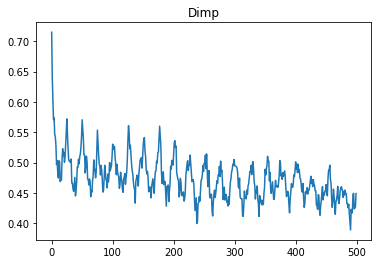

In [61]:
plt.plot(dimp_acc.mean(axis=0))
plt.title('Dimp')
plt.show()

# Plot of OCC subset

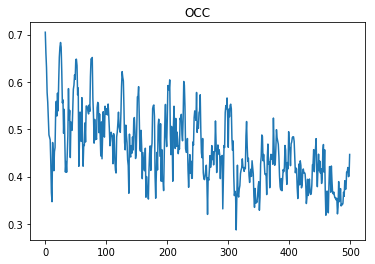

In [62]:
plt.title('OCC')
plt.plot(metrics_result['OCC'].mean(axis=0))
plt.show()

In [18]:
# Plot of deformation subset

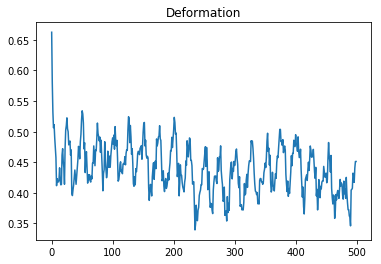

In [63]:
plt.title('Deformation')
plt.plot(metrics_result['Deformation'].mean(axis=0))
plt.show()

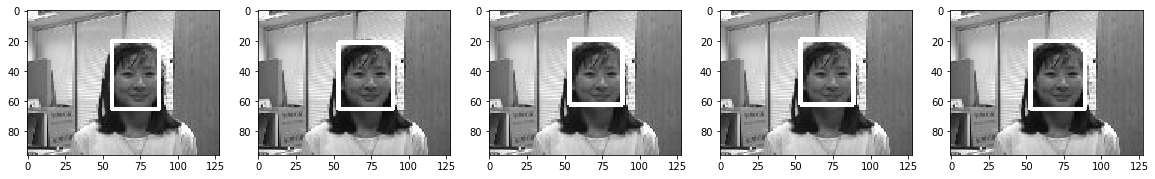

In [69]:
n_images = 500
siam_girl = np.loadtxt(os.path.join(dimp_dir, 'Girl.txt'), delimiter='\t')


girl_path = os.path.join(OTB100, 'Girl', 'img')
img = cv2.imread(os.path.join(girl_path, '0001.jpg'),0)


plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(2,5,i+1)
    siam_img = img.copy()
    r0 = convert_center_to_bbb(siam_girl[2*i*n_images,:]).astype(int)
    cv2.rectangle(siam_img, (r0[0],r0[1]),(r0[2],r0[3]),(255,0,0), 2)
    plt.imshow(siam_img, cmap='gray')

plt.show()

In [70]:

def show_acc_plot(name):

    try:
        gt_bbox = np.loadtxt(os.path.join(OTB100, name, 'groundtruth_rect.txt'), delimiter=',')
    except:
        gt_bbox = np.loadtxt(os.path.join(OTB100, name, 'groundtruth_rect.txt'), delimiter='\t')

    dimp_v = np.loadtxt(os.path.join(dimp_dir, name), delimiter='\t')
    min_dim = dimp_v.shape[0]


    gt_bbox = append_reverse_np(gt_bbox, 40)
    gt_bbox = gt_bbox[:min_dim,:]

    da = []
    for d, gt in zip(dimp_v, gt_bbox):
        # gt = convert_center_to_bbb(gt)
        d = convert_center_to_bbb(d)
        da.append(bb_intersection_over_union(d, convert_center_to_bbb(gt)))

    da = smooth(np.asarray(da))

    plt.title(f'Plot accuracy {name}')
    plt.plot(da)
    plt.show()

SyntaxError: 'continue' not properly in loop (<ipython-input-70-8ab6823dc09b>, line 9)